# Problem Set 4b - Frozen Lake Problem





In [1]:

import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random



## Load matrices

In [28]:
from scipy.io import loadmat

def load(fname):
    matdict = loadmat(fname)
    
    fl = np.array(matdict["FL"])

    flcost = np.array(matdict["FLCost"])
    return fl, flcost


FL,FL_cost  = load("matrices_4b1.mat")

n = FL_cost.shape[0]

In [29]:
#define directions
up = 0
right = 1
down = 2
left = 3
actions = ["up","right", "down", "left"]

num_actions = 4


# Look at Rewards heatmap

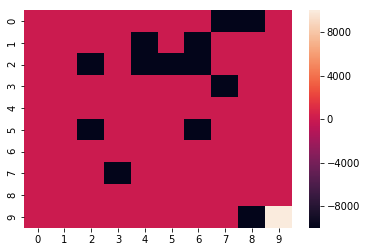

In [30]:
from seaborn import heatmap
heatmap(FL_cost)

# Define helper functions to move around in the grid

In [31]:
def get_next_action(current_state, action): 
    return (np.random.multinomial(1, FL[current_state[0], current_state[1], action, :])).argmax()

def get_next_state(current_state, action):
    if action == left:
        return (current_state[0], max(0, current_state[1]-1))
    if action == right:
        return (current_state[0], min(n-1, current_state[1]+1))
    if action == down:
        return (min(n-1, current_state[0]+1),  current_state[1])
    if action == up:
        return (max(0, current_state[0]-1),  current_state[1])
    
def step(current_state, action):
    next_action = get_next_action(current_state, action)
    next_state = get_next_state(current_state, next_action)
   
    return next_action, next_state


# Implement Q -Learning

In [44]:

#implement Q learning
lr = 0.1 #learning rate
gamma = 1 # discount factor
action_epsilon = 0.80
num_episodes = 5000 #number of iterations

Q = np.random.rand(n, n,num_actions) * 0.001

# print Q

start_state = (0,0)
# current_state = (0,0)
end_state = (n-1,n-1)

scores = []
for i in range(num_episodes):
    start_time = time.time()
    print "Now", i,
    current_state = (0,0)
    j = 0
    score = 0
#     while current_state != end_state:
    while current_state != end_state:
        #get the next action based on some probability 10% take random action, 90% take best action
        action_random_value = random.random()
        if action_random_value < action_epsilon:
            action = np.argmax(Q[current_state[0],current_state[1],:])
        else:
            action = random.randint(0,3)
        
        actual_next_action, next_state = step(current_state, action)
        reward = FL_cost[next_state[0], next_state[1]]
        score += reward
        current_Q = Q[current_state[0],current_state[1], action]
        Q[current_state[0],current_state[1], action] = current_Q +  lr*(reward + gamma * (np.max(Q[next_state[0], next_state[1],:]) - current_Q))
        current_state = next_state
    scores.append(score)
    print("elapsed time, ", time.time() - start_time)
            
    

 Now 0 ('elapsed time, ', 0.03938603401184082)
Now 1 ('elapsed time, ', 0.014288902282714844)
Now 2 ('elapsed time, ', 0.010210990905761719)
Now 3 ('elapsed time, ', 0.002936124801635742)
Now 4 ('elapsed time, ', 0.005706071853637695)
Now 5 ('elapsed time, ', 0.008909940719604492)
Now 6 ('elapsed time, ', 0.007220029830932617)
Now 7 ('elapsed time, ', 0.006083965301513672)
Now 8 ('elapsed time, ', 0.003654003143310547)
Now 9 ('elapsed time, ', 0.011252164840698242)
Now 10 ('elapsed time, ', 0.005552053451538086)
Now 11 ('elapsed time, ', 0.012209892272949219)
Now 12 ('elapsed time, ', 0.01273202896118164)
Now 13 ('elapsed time, ', 0.004695892333984375)
Now 14 ('elapsed time, ', 0.005384922027587891)
Now 15 ('elapsed time, ', 0.006973981857299805)
Now 16 ('elapsed time, ', 0.006573915481567383)
Now 17 ('elapsed time, ', 0.020264863967895508)
Now 18 ('elapsed time, ', 0.03283286094665527)
Now 19 ('elapsed time, ', 0.006872892379760742)
Now 20 ('elapsed time, ', 0.004562854766845703)
Now 

Now 186 ('elapsed time, ', 0.008810043334960938)
Now 187 ('elapsed time, ', 0.005066871643066406)
Now 188 ('elapsed time, ', 0.008334875106811523)
Now 189 ('elapsed time, ', 0.04732704162597656)
Now 190 ('elapsed time, ', 0.006170988082885742)
Now 191 ('elapsed time, ', 0.006453990936279297)
Now 192 ('elapsed time, ', 0.008659839630126953)
Now 193 ('elapsed time, ', 0.004333019256591797)
Now 194 ('elapsed time, ', 0.0184781551361084)
Now 195 ('elapsed time, ', 0.017350196838378906)
Now 196 ('elapsed time, ', 0.014491081237792969)
Now 197 ('elapsed time, ', 0.012814044952392578)
Now 198 ('elapsed time, ', 0.010992050170898438)
Now 199 ('elapsed time, ', 0.026720046997070312)
Now 200 ('elapsed time, ', 0.012798786163330078)
Now 201 ('elapsed time, ', 0.0819849967956543)
Now 202 ('elapsed time, ', 0.01155400276184082)
Now 203 ('elapsed time, ', 0.00964498519897461)
Now 204 ('elapsed time, ', 0.0057828426361083984)
Now 205 ('elapsed time, ', 0.030452966690063477)
Now 206 ('elapsed time, ',

Now 380 ('elapsed time, ', 0.0245058536529541)
Now 381 ('elapsed time, ', 0.018712997436523438)
Now 382 ('elapsed time, ', 0.0042841434478759766)
Now 383 ('elapsed time, ', 0.0077779293060302734)
Now 384 ('elapsed time, ', 0.0045468807220458984)
Now 385 ('elapsed time, ', 0.0051119327545166016)
Now 386 ('elapsed time, ', 0.0036869049072265625)
Now 387 ('elapsed time, ', 0.027431011199951172)
Now 388 ('elapsed time, ', 0.005418062210083008)
Now 389 ('elapsed time, ', 0.015753984451293945)
Now 390 ('elapsed time, ', 0.0037038326263427734)
Now 391 ('elapsed time, ', 0.014268159866333008)
Now 392 ('elapsed time, ', 0.004759073257446289)
Now 393 ('elapsed time, ', 0.002696990966796875)
Now 394 ('elapsed time, ', 0.012943029403686523)
Now 395 ('elapsed time, ', 0.006494998931884766)
Now 396 ('elapsed time, ', 0.004307985305786133)
Now 397 ('elapsed time, ', 0.013210058212280273)
Now 398 ('elapsed time, ', 0.009177207946777344)
Now 399 ('elapsed time, ', 0.0050618648529052734)
Now 400 ('elaps

Now 565 ('elapsed time, ', 0.0231170654296875)
Now 566 ('elapsed time, ', 0.02943897247314453)
Now 567 ('elapsed time, ', 0.020251989364624023)
Now 568 ('elapsed time, ', 0.013172149658203125)
Now 569 ('elapsed time, ', 0.012516975402832031)
Now 570 ('elapsed time, ', 0.004606008529663086)
Now 571 ('elapsed time, ', 0.011896133422851562)
Now 572 ('elapsed time, ', 0.0037140846252441406)
Now 573 ('elapsed time, ', 0.009711980819702148)
Now 574 ('elapsed time, ', 0.005994081497192383)
Now 575 ('elapsed time, ', 0.00554203987121582)
Now 576 ('elapsed time, ', 0.006905078887939453)
Now 577 ('elapsed time, ', 0.015049934387207031)
Now 578 ('elapsed time, ', 0.006496906280517578)
Now 579 ('elapsed time, ', 0.002746105194091797)
Now 580 ('elapsed time, ', 0.010939836502075195)
Now 581 ('elapsed time, ', 0.0075609683990478516)
Now 582 ('elapsed time, ', 0.00536799430847168)
Now 583 ('elapsed time, ', 0.0034089088439941406)
Now 584 ('elapsed time, ', 0.011381864547729492)
Now 585 ('elapsed time

Now 769 ('elapsed time, ', 0.015176773071289062)
Now 770 ('elapsed time, ', 0.010312080383300781)
Now 771 ('elapsed time, ', 0.01841115951538086)
Now 772 ('elapsed time, ', 0.02935194969177246)
Now 773 ('elapsed time, ', 0.0038530826568603516)
Now 774 ('elapsed time, ', 0.01770496368408203)
Now 775 ('elapsed time, ', 0.0060558319091796875)
Now 776 ('elapsed time, ', 0.0074880123138427734)
Now 777 ('elapsed time, ', 0.0028748512268066406)
Now 778 ('elapsed time, ', 0.006412029266357422)
Now 779 ('elapsed time, ', 0.00693202018737793)
Now 780 ('elapsed time, ', 0.003640890121459961)
Now 781 ('elapsed time, ', 0.01774287223815918)
Now 782 ('elapsed time, ', 0.004148960113525391)
Now 783 ('elapsed time, ', 0.005524873733520508)
Now 784 ('elapsed time, ', 0.01046895980834961)
Now 785 ('elapsed time, ', 0.007332801818847656)
Now 786 ('elapsed time, ', 0.004606008529663086)
Now 787 ('elapsed time, ', 0.002416849136352539)
Now 788 ('elapsed time, ', 0.006211996078491211)
Now 789 ('elapsed time

Now 951 ('elapsed time, ', 0.0053920745849609375)
Now 952 ('elapsed time, ', 0.01632380485534668)
Now 953 ('elapsed time, ', 0.013863086700439453)
Now 954 ('elapsed time, ', 0.0040209293365478516)
Now 955 ('elapsed time, ', 0.0043108463287353516)
Now 956 ('elapsed time, ', 0.0050868988037109375)
Now 957 ('elapsed time, ', 0.0034859180450439453)
Now 958 ('elapsed time, ', 0.01689600944519043)
Now 959 ('elapsed time, ', 0.0052487850189208984)
Now 960 ('elapsed time, ', 0.004257917404174805)
Now 961 ('elapsed time, ', 0.00457000732421875)
Now 962 ('elapsed time, ', 0.006556034088134766)
Now 963 ('elapsed time, ', 0.009106874465942383)
Now 964 ('elapsed time, ', 0.007122039794921875)
Now 965 ('elapsed time, ', 0.008778095245361328)
Now 966 ('elapsed time, ', 0.01046299934387207)
Now 967 ('elapsed time, ', 0.005185842514038086)
Now 968 ('elapsed time, ', 0.0033159255981445312)
Now 969 ('elapsed time, ', 0.007692098617553711)
Now 970 ('elapsed time, ', 0.008958101272583008)
Now 971 ('elapsed

Now 1140 ('elapsed time, ', 0.022433996200561523)
Now 1141 ('elapsed time, ', 0.008461952209472656)
Now 1142 ('elapsed time, ', 0.006438016891479492)
Now 1143 ('elapsed time, ', 0.004057884216308594)
Now 1144 ('elapsed time, ', 0.0058329105377197266)
Now 1145 ('elapsed time, ', 0.015065908432006836)
Now 1146 ('elapsed time, ', 0.005350828170776367)
Now 1147 ('elapsed time, ', 0.009238958358764648)
Now 1148 ('elapsed time, ', 0.004486083984375)
Now 1149 ('elapsed time, ', 0.005913972854614258)
Now 1150 ('elapsed time, ', 0.004559993743896484)
Now 1151 ('elapsed time, ', 0.00465083122253418)
Now 1152 ('elapsed time, ', 0.00856781005859375)
Now 1153 ('elapsed time, ', 0.024235010147094727)
Now 1154 ('elapsed time, ', 0.004567146301269531)
Now 1155 ('elapsed time, ', 0.008388042449951172)
Now 1156 ('elapsed time, ', 0.006946086883544922)
Now 1157 ('elapsed time, ', 0.004822969436645508)
Now 1158 ('elapsed time, ', 0.003101825714111328)
Now 1159 ('elapsed time, ', 0.002285003662109375)
Now 

Now 1326 ('elapsed time, ', 0.019019126892089844)
Now 1327 ('elapsed time, ', 0.007718086242675781)
Now 1328 ('elapsed time, ', 0.016981840133666992)
Now 1329 ('elapsed time, ', 0.0036559104919433594)
Now 1330 ('elapsed time, ', 0.012745857238769531)
Now 1331 ('elapsed time, ', 0.016155004501342773)
Now 1332 ('elapsed time, ', 0.0056040287017822266)
Now 1333 ('elapsed time, ', 0.005309104919433594)
Now 1334 ('elapsed time, ', 0.002084016799926758)
Now 1335 ('elapsed time, ', 0.007506847381591797)
Now 1336 ('elapsed time, ', 0.020421981811523438)
Now 1337 ('elapsed time, ', 0.011627197265625)
Now 1338 ('elapsed time, ', 0.0024759769439697266)
Now 1339 ('elapsed time, ', 0.009500980377197266)
Now 1340 ('elapsed time, ', 0.005263090133666992)
Now 1341 ('elapsed time, ', 0.0060198307037353516)
Now 1342 ('elapsed time, ', 0.012538909912109375)
Now 1343 ('elapsed time, ', 0.0026628971099853516)
Now 1344 ('elapsed time, ', 0.0047299861907958984)
Now 1345 ('elapsed time, ', 0.02443385124206543

Now 1500 ('elapsed time, ', 0.009746074676513672)
Now 1501 ('elapsed time, ', 0.008738994598388672)
Now 1502 ('elapsed time, ', 0.009134054183959961)
Now 1503 ('elapsed time, ', 0.015429019927978516)
Now 1504 ('elapsed time, ', 0.007169961929321289)
Now 1505 ('elapsed time, ', 0.0035898685455322266)
Now 1506 ('elapsed time, ', 0.004962921142578125)
Now 1507 ('elapsed time, ', 0.003823995590209961)
Now 1508 ('elapsed time, ', 0.01042795181274414)
Now 1509 ('elapsed time, ', 0.013753890991210938)
Now 1510 ('elapsed time, ', 0.01780104637145996)
Now 1511 ('elapsed time, ', 0.004423856735229492)
Now 1512 ('elapsed time, ', 0.008944988250732422)
Now 1513 ('elapsed time, ', 0.0034241676330566406)
Now 1514 ('elapsed time, ', 0.004808187484741211)
Now 1515 ('elapsed time, ', 0.008312225341796875)
Now 1516 ('elapsed time, ', 0.007909059524536133)
Now 1517 ('elapsed time, ', 0.009187936782836914)
Now 1518 ('elapsed time, ', 0.007883071899414062)
Now 1519 ('elapsed time, ', 0.00824594497680664)
N

Now 1684 ('elapsed time, ', 0.007826089859008789)
Now 1685 ('elapsed time, ', 0.00937795639038086)
Now 1686 ('elapsed time, ', 0.015501022338867188)
Now 1687 ('elapsed time, ', 0.018296003341674805)
Now 1688 ('elapsed time, ', 0.005701780319213867)
Now 1689 ('elapsed time, ', 0.004517078399658203)
Now 1690 ('elapsed time, ', 0.015396833419799805)
Now 1691 ('elapsed time, ', 0.00635981559753418)
Now 1692 ('elapsed time, ', 0.016258955001831055)
Now 1693 ('elapsed time, ', 0.0020017623901367188)
Now 1694 ('elapsed time, ', 0.004064083099365234)
Now 1695 ('elapsed time, ', 0.005238056182861328)
Now 1696 ('elapsed time, ', 0.006318092346191406)
Now 1697 ('elapsed time, ', 0.015192985534667969)
Now 1698 ('elapsed time, ', 0.015820980072021484)
Now 1699 ('elapsed time, ', 0.004026889801025391)
Now 1700 ('elapsed time, ', 0.010518074035644531)
Now 1701 ('elapsed time, ', 0.0037479400634765625)
Now 1702 ('elapsed time, ', 0.006730079650878906)
Now 1703 ('elapsed time, ', 0.004733085632324219)


Now 1880 ('elapsed time, ', 0.005224943161010742)
Now 1881 ('elapsed time, ', 0.0021190643310546875)
Now 1882 ('elapsed time, ', 0.004448890686035156)
Now 1883 ('elapsed time, ', 0.012346982955932617)
Now 1884 ('elapsed time, ', 0.008167028427124023)
Now 1885 ('elapsed time, ', 0.007920980453491211)
Now 1886 ('elapsed time, ', 0.008280038833618164)
Now 1887 ('elapsed time, ', 0.0039980411529541016)
Now 1888 ('elapsed time, ', 0.004698991775512695)
Now 1889 ('elapsed time, ', 0.015601158142089844)
Now 1890 ('elapsed time, ', 0.003813028335571289)
Now 1891 ('elapsed time, ', 0.003262042999267578)
Now 1892 ('elapsed time, ', 0.012779951095581055)
Now 1893 ('elapsed time, ', 0.010318994522094727)
Now 1894 ('elapsed time, ', 0.0092620849609375)
Now 1895 ('elapsed time, ', 0.011715173721313477)
Now 1896 ('elapsed time, ', 0.003342866897583008)
Now 1897 ('elapsed time, ', 0.013682126998901367)
Now 1898 ('elapsed time, ', 0.002668142318725586)
Now 1899 ('elapsed time, ', 0.007818937301635742)


Now 2059 ('elapsed time, ', 0.0028481483459472656)
Now 2060 ('elapsed time, ', 0.0032050609588623047)
Now 2061 ('elapsed time, ', 0.019041061401367188)
Now 2062 ('elapsed time, ', 0.008642911911010742)
Now 2063 ('elapsed time, ', 0.006926059722900391)
Now 2064 ('elapsed time, ', 0.004631996154785156)
Now 2065 ('elapsed time, ', 0.0059070587158203125)
Now 2066 ('elapsed time, ', 0.0036170482635498047)
Now 2067 ('elapsed time, ', 0.00444793701171875)
Now 2068 ('elapsed time, ', 0.004266023635864258)
Now 2069 ('elapsed time, ', 0.009268045425415039)
Now 2070 ('elapsed time, ', 0.008348941802978516)
Now 2071 ('elapsed time, ', 0.004800081253051758)
Now 2072 ('elapsed time, ', 0.014714956283569336)
Now 2073 ('elapsed time, ', 0.00685882568359375)
Now 2074 ('elapsed time, ', 0.005775928497314453)
Now 2075 ('elapsed time, ', 0.004171848297119141)
Now 2076 ('elapsed time, ', 0.016131162643432617)
Now 2077 ('elapsed time, ', 0.005609035491943359)
Now 2078 ('elapsed time, ', 0.003566026687622070

Now 2245 ('elapsed time, ', 0.011096000671386719)
Now 2246 ('elapsed time, ', 0.00859522819519043)
Now 2247 ('elapsed time, ', 0.006504058837890625)
Now 2248 ('elapsed time, ', 0.010899066925048828)
Now 2249 ('elapsed time, ', 0.005099058151245117)
Now 2250 ('elapsed time, ', 0.0074541568756103516)
Now 2251 ('elapsed time, ', 0.005259990692138672)
Now 2252 ('elapsed time, ', 0.0035178661346435547)
Now 2253 ('elapsed time, ', 0.0048940181732177734)
Now 2254 ('elapsed time, ', 0.003261089324951172)
Now 2255 ('elapsed time, ', 0.006769895553588867)
Now 2256 ('elapsed time, ', 0.012183904647827148)
Now 2257 ('elapsed time, ', 0.006079912185668945)
Now 2258 ('elapsed time, ', 0.0026459693908691406)
Now 2259 ('elapsed time, ', 0.005770206451416016)
Now 2260 ('elapsed time, ', 0.006289958953857422)
Now 2261 ('elapsed time, ', 0.007330179214477539)
Now 2262 ('elapsed time, ', 0.007071971893310547)
Now 2263 ('elapsed time, ', 0.002885103225708008)
Now 2264 ('elapsed time, ', 0.00426006317138671

Now 2415 ('elapsed time, ', 0.006523847579956055)
Now 2416 ('elapsed time, ', 0.006623983383178711)
Now 2417 ('elapsed time, ', 0.012516975402832031)
Now 2418 ('elapsed time, ', 0.0055429935455322266)
Now 2419 ('elapsed time, ', 0.012724876403808594)
Now 2420 ('elapsed time, ', 0.0044879913330078125)
Now 2421 ('elapsed time, ', 0.024279117584228516)
Now 2422 ('elapsed time, ', 0.006023883819580078)
Now 2423 ('elapsed time, ', 0.021229982376098633)
Now 2424 ('elapsed time, ', 0.00150299072265625)
Now 2425 ('elapsed time, ', 0.006602048873901367)
Now 2426 ('elapsed time, ', 0.014132976531982422)
Now 2427 ('elapsed time, ', 0.011842012405395508)
Now 2428 ('elapsed time, ', 0.0022330284118652344)
Now 2429 ('elapsed time, ', 0.011254072189331055)
Now 2430 ('elapsed time, ', 0.004984140396118164)
Now 2431 ('elapsed time, ', 0.0037598609924316406)
Now 2432 ('elapsed time, ', 0.005758047103881836)
Now 2433 ('elapsed time, ', 0.009300947189331055)
Now 2434 ('elapsed time, ', 0.00940585136413574

Now 2584 ('elapsed time, ', 0.0071909427642822266)
Now 2585 ('elapsed time, ', 0.00804901123046875)
Now 2586 ('elapsed time, ', 0.0034210681915283203)
Now 2587 ('elapsed time, ', 0.005631923675537109)
Now 2588 ('elapsed time, ', 0.008368968963623047)
Now 2589 ('elapsed time, ', 0.0047609806060791016)
Now 2590 ('elapsed time, ', 0.005050182342529297)
Now 2591 ('elapsed time, ', 0.005011796951293945)
Now 2592 ('elapsed time, ', 0.0037889480590820312)
Now 2593 ('elapsed time, ', 0.00632786750793457)
Now 2594 ('elapsed time, ', 0.009062051773071289)
Now 2595 ('elapsed time, ', 0.007534980773925781)
Now 2596 ('elapsed time, ', 0.007678031921386719)
Now 2597 ('elapsed time, ', 0.005888938903808594)
Now 2598 ('elapsed time, ', 0.01112508773803711)
Now 2599 ('elapsed time, ', 0.007735013961791992)
Now 2600 ('elapsed time, ', 0.00745701789855957)
Now 2601 ('elapsed time, ', 0.0022351741790771484)
Now 2602 ('elapsed time, ', 0.003701925277709961)
Now 2603 ('elapsed time, ', 0.012980222702026367)

Now 2779 ('elapsed time, ', 0.013219118118286133)
Now 2780 ('elapsed time, ', 0.006561994552612305)
Now 2781 ('elapsed time, ', 0.004519939422607422)
Now 2782 ('elapsed time, ', 0.0076448917388916016)
Now 2783 ('elapsed time, ', 0.02039504051208496)
Now 2784 ('elapsed time, ', 0.01024484634399414)
Now 2785 ('elapsed time, ', 0.010821819305419922)
Now 2786 ('elapsed time, ', 0.00444793701171875)
Now 2787 ('elapsed time, ', 0.01058506965637207)
Now 2788 ('elapsed time, ', 0.007905960083007812)
Now 2789 ('elapsed time, ', 0.004270076751708984)
Now 2790 ('elapsed time, ', 0.005964994430541992)
Now 2791 ('elapsed time, ', 0.014394998550415039)
Now 2792 ('elapsed time, ', 0.008181095123291016)
Now 2793 ('elapsed time, ', 0.00691986083984375)
Now 2794 ('elapsed time, ', 0.002268075942993164)
Now 2795 ('elapsed time, ', 0.026378154754638672)
Now 2796 ('elapsed time, ', 0.003866910934448242)
Now 2797 ('elapsed time, ', 0.0036280155181884766)
Now 2798 ('elapsed time, ', 0.0033740997314453125)
No

Now 2974 ('elapsed time, ', 0.0030798912048339844)
Now 2975 ('elapsed time, ', 0.005277872085571289)
Now 2976 ('elapsed time, ', 0.005645036697387695)
Now 2977 ('elapsed time, ', 0.0025010108947753906)
Now 2978 ('elapsed time, ', 0.00995492935180664)
Now 2979 ('elapsed time, ', 0.004604816436767578)
Now 2980 ('elapsed time, ', 0.00988316535949707)
Now 2981 ('elapsed time, ', 0.004825115203857422)
Now 2982 ('elapsed time, ', 0.004698038101196289)
Now 2983 ('elapsed time, ', 0.005413055419921875)
Now 2984 ('elapsed time, ', 0.006386995315551758)
Now 2985 ('elapsed time, ', 0.012677907943725586)
Now 2986 ('elapsed time, ', 0.0013248920440673828)
Now 2987 ('elapsed time, ', 0.006434917449951172)
Now 2988 ('elapsed time, ', 0.005647897720336914)
Now 2989 ('elapsed time, ', 0.0029129981994628906)
Now 2990 ('elapsed time, ', 0.004118204116821289)
Now 2991 ('elapsed time, ', 0.00857996940612793)
Now 2992 ('elapsed time, ', 0.0027129650115966797)
Now 2993 ('elapsed time, ', 0.003780126571655273

Now 3145 ('elapsed time, ', 0.004601001739501953)
Now 3146 ('elapsed time, ', 0.02451491355895996)
Now 3147 ('elapsed time, ', 0.013226032257080078)
Now 3148 ('elapsed time, ', 0.009411096572875977)
Now 3149 ('elapsed time, ', 0.010761022567749023)
Now 3150 ('elapsed time, ', 0.02122807502746582)
Now 3151 ('elapsed time, ', 0.013163089752197266)
Now 3152 ('elapsed time, ', 0.018352031707763672)
Now 3153 ('elapsed time, ', 0.009028911590576172)
Now 3154 ('elapsed time, ', 0.0028438568115234375)
Now 3155 ('elapsed time, ', 0.014013051986694336)
Now 3156 ('elapsed time, ', 0.0025680065155029297)
Now 3157 ('elapsed time, ', 0.00867605209350586)
Now 3158 ('elapsed time, ', 0.0032529830932617188)
Now 3159 ('elapsed time, ', 0.023173809051513672)
Now 3160 ('elapsed time, ', 0.00969386100769043)
Now 3161 ('elapsed time, ', 0.0039958953857421875)
Now 3162 ('elapsed time, ', 0.0049839019775390625)
Now 3163 ('elapsed time, ', 0.005491018295288086)
Now 3164 ('elapsed time, ', 0.006887912750244141)

Now 3323 ('elapsed time, ', 0.012039899826049805)
Now 3324 ('elapsed time, ', 0.016555070877075195)
Now 3325 ('elapsed time, ', 0.011340141296386719)
Now 3326 ('elapsed time, ', 0.012593984603881836)
Now 3327 ('elapsed time, ', 0.0037360191345214844)
Now 3328 ('elapsed time, ', 0.015119791030883789)
Now 3329 ('elapsed time, ', 0.0064239501953125)
Now 3330 ('elapsed time, ', 0.005112886428833008)
Now 3331 ('elapsed time, ', 0.005845069885253906)
Now 3332 ('elapsed time, ', 0.0023190975189208984)
Now 3333 ('elapsed time, ', 0.003735065460205078)
Now 3334 ('elapsed time, ', 0.005059957504272461)
Now 3335 ('elapsed time, ', 0.006699085235595703)
Now 3336 ('elapsed time, ', 0.008135795593261719)
Now 3337 ('elapsed time, ', 0.01587390899658203)
Now 3338 ('elapsed time, ', 0.002908945083618164)
Now 3339 ('elapsed time, ', 0.018054962158203125)
Now 3340 ('elapsed time, ', 0.008306026458740234)
Now 3341 ('elapsed time, ', 0.00911402702331543)
Now 3342 ('elapsed time, ', 0.0024220943450927734)
N

Now 3489 ('elapsed time, ', 0.00652313232421875)
Now 3490 ('elapsed time, ', 0.008002996444702148)
Now 3491 ('elapsed time, ', 0.016788005828857422)
Now 3492 ('elapsed time, ', 0.010743141174316406)
Now 3493 ('elapsed time, ', 0.004376888275146484)
Now 3494 ('elapsed time, ', 0.004489898681640625)
Now 3495 ('elapsed time, ', 0.008118867874145508)
Now 3496 ('elapsed time, ', 0.005210161209106445)
Now 3497 ('elapsed time, ', 0.013923883438110352)
Now 3498 ('elapsed time, ', 0.018297195434570312)
Now 3499 ('elapsed time, ', 0.0026781558990478516)
Now 3500 ('elapsed time, ', 0.010243892669677734)
Now 3501 ('elapsed time, ', 0.004631996154785156)
Now 3502 ('elapsed time, ', 0.0020461082458496094)
Now 3503 ('elapsed time, ', 0.013331890106201172)
Now 3504 ('elapsed time, ', 0.01176595687866211)
Now 3505 ('elapsed time, ', 0.0021440982818603516)
Now 3506 ('elapsed time, ', 0.0071620941162109375)
Now 3507 ('elapsed time, ', 0.015845060348510742)
Now 3508 ('elapsed time, ', 0.022152185440063477

Now 3676 ('elapsed time, ', 0.012256860733032227)
Now 3677 ('elapsed time, ', 0.006854057312011719)
Now 3678 ('elapsed time, ', 0.009708166122436523)
Now 3679 ('elapsed time, ', 0.003013134002685547)
Now 3680 ('elapsed time, ', 0.0071561336517333984)
Now 3681 ('elapsed time, ', 0.014716863632202148)
Now 3682 ('elapsed time, ', 0.004079103469848633)
Now 3683 ('elapsed time, ', 0.00829005241394043)
Now 3684 ('elapsed time, ', 0.004076957702636719)
Now 3685 ('elapsed time, ', 0.006529092788696289)
Now 3686 ('elapsed time, ', 0.0044329166412353516)
Now 3687 ('elapsed time, ', 0.011981010437011719)
Now 3688 ('elapsed time, ', 0.012706995010375977)
Now 3689 ('elapsed time, ', 0.0033829212188720703)
Now 3690 ('elapsed time, ', 0.006724119186401367)
Now 3691 ('elapsed time, ', 0.0018329620361328125)
Now 3692 ('elapsed time, ', 0.00516200065612793)
Now 3693 ('elapsed time, ', 0.011625051498413086)
Now 3694 ('elapsed time, ', 0.0025420188903808594)
Now 3695 ('elapsed time, ', 0.00673794746398925

Now 3843 ('elapsed time, ', 0.0076961517333984375)
Now 3844 ('elapsed time, ', 0.021054983139038086)
Now 3845 ('elapsed time, ', 0.016006946563720703)
Now 3846 ('elapsed time, ', 0.004704952239990234)
Now 3847 ('elapsed time, ', 0.008805990219116211)
Now 3848 ('elapsed time, ', 0.018435001373291016)
Now 3849 ('elapsed time, ', 0.0036308765411376953)
Now 3850 ('elapsed time, ', 0.00943899154663086)
Now 3851 ('elapsed time, ', 0.0067348480224609375)
Now 3852 ('elapsed time, ', 0.0034952163696289062)
Now 3853 ('elapsed time, ', 0.004940986633300781)
Now 3854 ('elapsed time, ', 0.004305839538574219)
Now 3855 ('elapsed time, ', 0.021638870239257812)
Now 3856 ('elapsed time, ', 0.010354995727539062)
Now 3857 ('elapsed time, ', 0.00886082649230957)
Now 3858 ('elapsed time, ', 0.011481046676635742)
Now 3859 ('elapsed time, ', 0.013150930404663086)
Now 3860 ('elapsed time, ', 0.006287097930908203)
Now 3861 ('elapsed time, ', 0.0058040618896484375)
Now 3862 ('elapsed time, ', 0.00528788566589355

Now 4016 ('elapsed time, ', 0.013267993927001953)
Now 4017 ('elapsed time, ', 0.02410292625427246)
Now 4018 ('elapsed time, ', 0.03080582618713379)
Now 4019 ('elapsed time, ', 0.013707876205444336)
Now 4020 ('elapsed time, ', 0.0052950382232666016)
Now 4021 ('elapsed time, ', 0.015196084976196289)
Now 4022 ('elapsed time, ', 0.011420965194702148)
Now 4023 ('elapsed time, ', 0.012166023254394531)
Now 4024 ('elapsed time, ', 0.008865118026733398)
Now 4025 ('elapsed time, ', 0.008730888366699219)
Now 4026 ('elapsed time, ', 0.014216184616088867)
Now 4027 ('elapsed time, ', 0.013701915740966797)
Now 4028 ('elapsed time, ', 0.029180049896240234)
Now 4029 ('elapsed time, ', 0.018977880477905273)
Now 4030 ('elapsed time, ', 0.031075000762939453)
Now 4031 ('elapsed time, ', 0.01014399528503418)
Now 4032 ('elapsed time, ', 0.015815019607543945)
Now 4033 ('elapsed time, ', 0.005858898162841797)
Now 4034 ('elapsed time, ', 0.007012128829956055)
Now 4035 ('elapsed time, ', 0.010124921798706055)
No

Now 4192 ('elapsed time, ', 0.017969846725463867)
Now 4193 ('elapsed time, ', 0.008804082870483398)
Now 4194 ('elapsed time, ', 0.012537956237792969)
Now 4195 ('elapsed time, ', 0.005980014801025391)
Now 4196 ('elapsed time, ', 0.006131887435913086)
Now 4197 ('elapsed time, ', 0.002971172332763672)
Now 4198 ('elapsed time, ', 0.0025739669799804688)
Now 4199 ('elapsed time, ', 0.004403114318847656)
Now 4200 ('elapsed time, ', 0.0029850006103515625)
Now 4201 ('elapsed time, ', 0.024737834930419922)
Now 4202 ('elapsed time, ', 0.024477005004882812)
Now 4203 ('elapsed time, ', 0.005079984664916992)
Now 4204 ('elapsed time, ', 0.011913061141967773)
Now 4205 ('elapsed time, ', 0.004034996032714844)
Now 4206 ('elapsed time, ', 0.005321025848388672)
Now 4207 ('elapsed time, ', 0.006036996841430664)
Now 4208 ('elapsed time, ', 0.009492158889770508)
Now 4209 ('elapsed time, ', 0.0071070194244384766)
Now 4210 ('elapsed time, ', 0.004667997360229492)
Now 4211 ('elapsed time, ', 0.01043105125427246

Now 4362 ('elapsed time, ', 0.012014150619506836)
Now 4363 ('elapsed time, ', 0.01349496841430664)
Now 4364 ('elapsed time, ', 0.0029888153076171875)
Now 4365 ('elapsed time, ', 0.004909038543701172)
Now 4366 ('elapsed time, ', 0.010648012161254883)
Now 4367 ('elapsed time, ', 0.009634017944335938)
Now 4368 ('elapsed time, ', 0.009363174438476562)
Now 4369 ('elapsed time, ', 0.008371114730834961)
Now 4370 ('elapsed time, ', 0.006428956985473633)
Now 4371 ('elapsed time, ', 0.0034019947052001953)
Now 4372 ('elapsed time, ', 0.0278780460357666)
Now 4373 ('elapsed time, ', 0.005201101303100586)
Now 4374 ('elapsed time, ', 0.007246971130371094)
Now 4375 ('elapsed time, ', 0.008584022521972656)
Now 4376 ('elapsed time, ', 0.006654024124145508)
Now 4377 ('elapsed time, ', 0.008008003234863281)
Now 4378 ('elapsed time, ', 0.008436918258666992)
Now 4379 ('elapsed time, ', 0.007477998733520508)
Now 4380 ('elapsed time, ', 0.009802818298339844)
Now 4381 ('elapsed time, ', 0.00786590576171875)
No

Now 4543 ('elapsed time, ', 0.010487079620361328)
Now 4544 ('elapsed time, ', 0.0032629966735839844)
Now 4545 ('elapsed time, ', 0.009569168090820312)
Now 4546 ('elapsed time, ', 0.01861882209777832)
Now 4547 ('elapsed time, ', 0.004124164581298828)
Now 4548 ('elapsed time, ', 0.00751185417175293)
Now 4549 ('elapsed time, ', 0.0039958953857421875)
Now 4550 ('elapsed time, ', 0.003267049789428711)
Now 4551 ('elapsed time, ', 0.00976705551147461)
Now 4552 ('elapsed time, ', 0.0065190792083740234)
Now 4553 ('elapsed time, ', 0.00800013542175293)
Now 4554 ('elapsed time, ', 0.005681037902832031)
Now 4555 ('elapsed time, ', 0.01316690444946289)
Now 4556 ('elapsed time, ', 0.007133960723876953)
Now 4557 ('elapsed time, ', 0.009035825729370117)
Now 4558 ('elapsed time, ', 0.004667997360229492)
Now 4559 ('elapsed time, ', 0.0068819522857666016)
Now 4560 ('elapsed time, ', 0.010664939880371094)
Now 4561 ('elapsed time, ', 0.0038640499114990234)
Now 4562 ('elapsed time, ', 0.01968097686767578)
N

Now 4716 ('elapsed time, ', 0.01184701919555664)
Now 4717 ('elapsed time, ', 0.013815164566040039)
Now 4718 ('elapsed time, ', 0.01808619499206543)
Now 4719 ('elapsed time, ', 0.01161503791809082)
Now 4720 ('elapsed time, ', 0.003843069076538086)
Now 4721 ('elapsed time, ', 0.004145145416259766)
Now 4722 ('elapsed time, ', 0.005280971527099609)
Now 4723 ('elapsed time, ', 0.03953695297241211)
Now 4724 ('elapsed time, ', 0.029857158660888672)
Now 4725 ('elapsed time, ', 0.008417129516601562)
Now 4726 ('elapsed time, ', 0.009052038192749023)
Now 4727 ('elapsed time, ', 0.02013993263244629)
Now 4728 ('elapsed time, ', 0.007225990295410156)
Now 4729 ('elapsed time, ', 0.0017480850219726562)
Now 4730 ('elapsed time, ', 0.011651992797851562)
Now 4731 ('elapsed time, ', 0.06633400917053223)
Now 4732 ('elapsed time, ', 0.009320974349975586)
Now 4733 ('elapsed time, ', 0.08681988716125488)
Now 4734 ('elapsed time, ', 0.010913848876953125)
Now 4735 ('elapsed time, ', 0.0025680065155029297)
Now 4

Now 4883 ('elapsed time, ', 0.005218029022216797)
Now 4884 ('elapsed time, ', 0.011459112167358398)
Now 4885 ('elapsed time, ', 0.005697011947631836)
Now 4886 ('elapsed time, ', 0.006064891815185547)
Now 4887 ('elapsed time, ', 0.0049610137939453125)
Now 4888 ('elapsed time, ', 0.008875131607055664)
Now 4889 ('elapsed time, ', 0.0033028125762939453)
Now 4890 ('elapsed time, ', 0.005254030227661133)
Now 4891 ('elapsed time, ', 0.011263132095336914)
Now 4892 ('elapsed time, ', 0.004332065582275391)
Now 4893 ('elapsed time, ', 0.009340047836303711)
Now 4894 ('elapsed time, ', 0.005915164947509766)
Now 4895 ('elapsed time, ', 0.0058138370513916016)
Now 4896 ('elapsed time, ', 0.021008014678955078)
Now 4897 ('elapsed time, ', 0.012565135955810547)
Now 4898 ('elapsed time, ', 0.005960941314697266)
Now 4899 ('elapsed time, ', 0.005614042282104492)
Now 4900 ('elapsed time, ', 0.004956960678100586)
Now 4901 ('elapsed time, ', 0.0018849372863769531)
Now 4902 ('elapsed time, ', 0.0126130580902099

## Lets see the heatmap of Q values

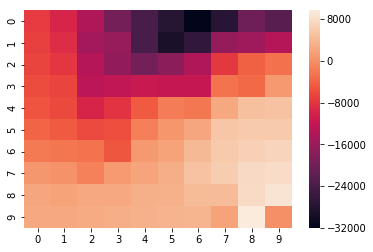

In [40]:
heatmap(Q.max(2))

# lets see the learning rate

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """


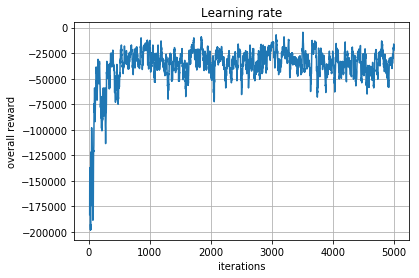

In [49]:
import pandas as pd

scores = np.array(scores)
iterations = range(len(scores))
av_scores = pd.rolling_mean(scores,20)

plt.plot(iterations, av_scores)

plt.xlabel('iterations')
plt.ylabel('overall reward')
plt.title('Learning rate')
plt.grid(True)
plt.show()

# Determine the policy

In [50]:
policy = Q.argmax(2)
policy

array([[3, 0, 1, 1, 2, 0, 1, 3, 1, 3],
       [3, 1, 2, 2, 1, 3, 3, 2, 0, 0],
       [1, 1, 3, 0, 1, 1, 1, 3, 3, 3],
       [3, 1, 0, 2, 2, 0, 2, 2, 0, 0],
       [0, 2, 3, 2, 1, 2, 0, 2, 3, 3],
       [2, 0, 3, 1, 3, 3, 3, 0, 1, 1],
       [0, 1, 3, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 2, 3, 2, 2, 3, 1, 1],
       [0, 3, 3, 0, 1, 0, 2, 3, 3, 2],
       [3, 1, 0, 2, 2, 0, 0, 1, 1, 3]])

# Output as matlab .mat file



In [54]:
from scipy.io import savemat
policy = policy+1


mdict = {'policy': policy}
savemat("VivekSah4b1.mat", mdict)

In [55]:
mdict2 = {'Q': Q, "scores": scores}
savemat("VivekSah4b1_q_scores.mat", mdict2)

# Test the policy

In [42]:
#test policy
start_state = (0,0)
end_state= (9,9)
current_state = (0,0)

while current_state != end_state:
    action = policy[current_state[0], current_state[1]]
    actual_next_action, next_state = step(current_state, action)
    print "current_state", current_state, "action", actions[action], "actual_action", actions[actual_next_action]
    current_state = next_state

current_state (0, 0) action left actual_action right
current_state (0, 1) action up actual_action down
current_state (1, 1) action right actual_action up
current_state (0, 1) action up actual_action left
current_state (0, 0) action left actual_action down
current_state (1, 0) action left actual_action up
current_state (0, 0) action left actual_action down
current_state (1, 0) action left actual_action right
current_state (1, 1) action right actual_action left
current_state (1, 0) action left actual_action right
current_state (1, 1) action right actual_action up
current_state (0, 1) action up actual_action right
current_state (0, 2) action right actual_action down
current_state (1, 2) action left actual_action right
current_state (1, 3) action down actual_action left
current_state (1, 2) action left actual_action left
current_state (1, 1) action right actual_action down
current_state (2, 1) action right actual_action left
current_state (2, 0) action right actual_action right
current_sta